In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler,power_transform
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,NuSVR,LinearSVR
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,BayesianRidge,SGDRegressor,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import NuSVR
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PowerTransformer
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from datetime import date
import random
import calendar
from datetime import date
import joblib
import math
%matplotlib inline

In [2]:
data_I=pd.read_csv('data_I.csv')
data_II=pd.read_csv('data_II.csv')
data_III=pd.read_csv('data_III.csv')
pd.set_option('max_columns', None)
data_I

,Unnamed: 0,Date,Month,Name,Depart Times,Departure,Arrival Times,Arrival,Duration,No. of Stops,price
0,0,1,1,Air Asia,15:50,Chennai,17:00,Bangalore,1h 10m,Non Stop,"1,443"
1,1,1,1,Air Asia,22:35,Chennai,23:45,Bangalore,1h 10m,Non Stop,"1,443"
2,2,1,1,IndiGo,05:25,Chennai,06:25,Bangalore,1h 00m,Non Stop,"1,444"
3,3,1,1,IndiGo,13:05,Chennai,14:10,Bangalore,1h 05m,Non Stop,"1,444"
4,4,1,1,IndiGo,16:30,Chennai,17:35,Bangalore,1h 05m,Non Stop,"1,444"
...,...,...,...,...,...,...,...,...,...,...,...
11205,11205,1,2,Vistara,19:45,Mumbai,13:50,Goa,18h 05m,1 Stop,"11,414"
11206,11206,1,2,Vistara,19:45,Mumbai,21:20,Goa,25h 35m,1 Stop,"11,414"
11207,11207,1,2,Go First,23:45,Mumbai,13:30,Goa,13h 45m,1 Stop,"12,223"
11208,11208,1,2,Go First,22:40,Mumbai,13:30,Goa,14h 50m,1 Stop,"12,223"


In [3]:
data_II

,Unnamed: 0,Date,Month,Name,Depart Times,Departure,Arrival Times,Arrival,Duration,No. of Stops,price
0,0,1,1,SpiceJet,06:15,New Delhi,21:10,Bangalore,14h 55m,1 Stop,"3,993"
1,1,1,1,Air India,06:10,New Delhi,08:55,Bangalore,2h 45m,Non Stop,"4,007"
2,2,1,1,Vistara,10:00,New Delhi,08:50,Bangalore,22h 50m,1 Stop,"4,034"
3,3,1,1,Vistara,07:30,New Delhi,08:50,Bangalore,25h 20m,1 Stop,"4,034"
4,4,1,1,Air Asia,08:00,New Delhi,10:40,Bangalore,2h 40m,Non Stop,"4,199"
...,...,...,...,...,...,...,...,...,...,...,...
10669,10669,1,2,Vistara,20:15,Ahmedabad,21:20,Goa,25h 05m,1 Stop,"11,215"
10670,10670,1,2,Go First,22:05,Ahmedabad,13:30,Goa,15h 25m,1 Stop,"11,871"
10671,10671,1,2,Vistara,20:15,Ahmedabad,14:05,Goa,17h 50m,2 Stop(s),"12,636"
10672,10672,1,2,Vistara,20:15,Ahmedabad,14:05,Goa,17h 50m,2 Stop(s),"12,636"


In [4]:
data_III

,Unnamed: 0,Date,Month,Name,Depart Times,Departure,Arrival Times,Arrival,Duration,No. of Stops,price
0,0,1,1,IndiGo,02:30,Goa,03:45,Bangalore,1h 15m,Non Stop,"4,161"
1,1,1,1,IndiGo,03:35,Goa,07:55,Bangalore,4h 20m,1 Stop,"4,424"
2,2,1,1,IndiGo,03:35,Goa,10:15,Bangalore,6h 40m,1 Stop,"4,424"
3,3,1,1,IndiGo,06:25,Goa,07:40,Bangalore,1h 15m,Non Stop,"5,736"
4,4,1,1,Vistara,00:20,Goa,07:50,Bangalore,7h 30m,1 Stop,"6,556"
...,...,...,...,...,...,...,...,...,...,...,...
10488,10488,15,2,Air India,13:30,Jaipur,13:15,Goa,23h 45m,1 Stop,"7,079"
10489,10489,15,2,Air Asia,23:50,Jaipur,07:50,Goa,8h 00m,1 Stop,"7,227"
10490,10490,15,2,Air India,20:35,Jaipur,13:15,Goa,16h 40m,1 Stop,"7,299"
10491,10491,15,2,IndiGo,07:45,Jaipur,14:35,Goa,6h 50m,1 Stop,"7,383"


In [5]:
data_I=data_I.drop(['Unnamed: 0'],axis=1)
data_II=data_II.drop(['Unnamed: 0'],axis=1)
data_III=data_III.drop(['Unnamed: 0'],axis=1)

In [6]:
data=pd.concat([data_I,data_II,data_III])
data

,Date,Month,Name,Depart Times,Departure,Arrival Times,Arrival,Duration,No. of Stops,price
0,1,1,Air Asia,15:50,Chennai,17:00,Bangalore,1h 10m,Non Stop,"1,443"
1,1,1,Air Asia,22:35,Chennai,23:45,Bangalore,1h 10m,Non Stop,"1,443"
2,1,1,IndiGo,05:25,Chennai,06:25,Bangalore,1h 00m,Non Stop,"1,444"
3,1,1,IndiGo,13:05,Chennai,14:10,Bangalore,1h 05m,Non Stop,"1,444"
4,1,1,IndiGo,16:30,Chennai,17:35,Bangalore,1h 05m,Non Stop,"1,444"
...,...,...,...,...,...,...,...,...,...,...
10488,15,2,Air India,13:30,Jaipur,13:15,Goa,23h 45m,1 Stop,"7,079"
10489,15,2,Air Asia,23:50,Jaipur,07:50,Goa,8h 00m,1 Stop,"7,227"
10490,15,2,Air India,20:35,Jaipur,13:15,Goa,16h 40m,1 Stop,"7,299"
10491,15,2,IndiGo,07:45,Jaipur,14:35,Goa,6h 50m,1 Stop,"7,383"


### Reset index of data

In [7]:
data=data.reset_index(drop=True)

In [8]:
data[['Name','Departure','Arrival','No. of Stops','Date','Month','No. of Stops']].describe(include='all')

,Name,Departure,Arrival,No. of Stops,Date,Month,No. of Stops
count,32377,32377,32377,32377,32377.000000,32377.000000,32377
unique,7,9,9,5,NaN,NaN,5
top,Air India,New Delhi,Kolkata,1 Stop,NaN,NaN,1 Stop
freq,9003,4038,4865,21828,NaN,NaN,21828
mean,NaN,NaN,NaN,NaN,14.588906,1.245761,NaN
std,NaN,NaN,NaN,NaN,11.878623,0.430544,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,15.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,25.000000,1.000000,NaN


### Replace ',' in price column
### conv duration to mins only
### conv no. of stops to numeric value
### conv date and month to no. of days from today till departure (as the price will differ on how advancedly the ticket is booked)

In [9]:
for i in range(len(data['price'])):
    data['price'].iloc[i]=int(data['price'].iloc[i].replace(',',''))

In [10]:
for i in range(len(data['Duration'])):
    hour=int(data['Duration'].iloc[i].split()[0].replace('h',''))
    minute=int(data['Duration'].iloc[i].split()[1].replace('m',''))
    timex=(hour*60)+minute
    data['Duration'].iloc[i]=timex

In [11]:
for i in range(len(data['Depart Times'])):
    hour=int(data['Depart Times'].iloc[i].replace(':',' ').split()[0].replace('h',''))
    minute=int(data['Depart Times'].iloc[i].replace(':',' ').split()[1].replace('m',''))
    timex=(hour*60)+minute
    data['Depart Times'].iloc[i]=timex
    
    hour=int(data['Arrival Times'].iloc[i].replace(':',' ').split()[0].replace('h',''))
    minute=int(data['Arrival Times'].iloc[i].replace(':',' ').split()[1].replace('m',''))
    timex=(hour*60)+minute
    data['Arrival Times'].iloc[i]=timex

In [12]:
for i in range(len(data['No. of Stops'])):
    if data['No. of Stops'][i].split()[0]=='Non':
        data['No. of Stops'].iloc[i]=0
    else:
        data['No. of Stops'].iloc[i]=int(data['No. of Stops'][i].split()[0])

In [13]:
listy=list(set(data.Departure.values))
misty=list(set(data.Arrival.values))
listy.extend(misty)
unique=list(set(listy))
dicty={}
for i in range(len(unique)):
    dicty[unique[i]]=i+1
print(dicty)

{'Chennai': 1, 'Jaipur': 2, 'Mumbai': 3, 'Bangalore': 4, 'Agra': 5, 'Ahmedabad': 6, 'New Delhi': 7, 'Goa': 8, 'Kolkata': 9, 'Hyderabad': 10, 'Pune': 11}


In [14]:
for i in range(len(data.Departure)):
    data['Departure'].iloc[i]=dicty[data['Departure'][i]]
    data['Arrival'].iloc[i]=dicty[data['Arrival'][i]]

In [15]:
listy=list(set(data.Name.values))
dicty={}
for i in range(len(listy)):
    dicty[listy[i]]=i+1
print(dicty)

{'Air India': 1, 'SpiceJet': 2, 'TruJet': 3, 'Go First': 4, 'IndiGo': 5, 'Air Asia': 6, 'Vistara': 7}


In [16]:
for i in range(len(data.Name)):
    data['Name'].iloc[i]=dicty[data['Name'][i]]

In [17]:
data['Name'] = data['Name'].astype(int)
data['Depart Times'] = data['Depart Times'].astype(int)
data['Departure'] = data['Departure'].astype(int)
data['Arrival Times'] = data['Arrival Times'].astype(int)
data['Arrival'] = data['Arrival'].astype(int)
data['Duration'] = data['Duration'].astype(int)
data['No. of Stops'] = data['No. of Stops'].astype(int)
data['Date'] = data['Date'].astype(int)
data['Month'] = data['Month'].astype(int)
data['price'] = data['price'].astype(int)

In [18]:
data[data.duplicated()]

,Date,Month,Name,Depart Times,Departure,Arrival Times,Arrival,Duration,No. of Stops,price
51,1,1,1,1220,1,1190,4,1410,2,10025
53,1,1,1,595,1,1190,4,2035,2,10025
67,1,1,1,1020,1,1190,4,1610,2,12545
175,1,1,1,805,1,770,3,1405,2,10054
383,1,1,7,585,1,1255,10,2110,2,6398
...,...,...,...,...,...,...,...,...,...,...
32352,15,2,1,225,2,885,8,660,2,6126
32353,15,2,1,225,2,885,8,660,2,6126
32355,15,2,1,810,2,410,8,1040,2,6126
32356,15,2,1,810,2,410,8,1040,2,6126


In [19]:
data=data.drop_duplicates()
data

,Date,Month,Name,Depart Times,Departure,Arrival Times,Arrival,Duration,No. of Stops,price
0,1,1,6,950,1,1020,4,70,0,1443
1,1,1,6,1355,1,1425,4,70,0,1443
2,1,1,5,325,1,385,4,60,0,1444
3,1,1,5,785,1,850,4,65,0,1444
4,1,1,5,990,1,1055,4,65,0,1444
...,...,...,...,...,...,...,...,...,...,...
32372,15,2,1,810,2,795,8,1425,1,7079
32373,15,2,6,1430,2,470,8,480,1,7227
32374,15,2,1,1235,2,795,8,1000,1,7299
32375,15,2,5,465,2,875,8,410,1,7383


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31212 entries, 0 to 32376
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Date           31212 non-null  int32
 1   Month          31212 non-null  int32
 2   Name           31212 non-null  int32
 3   Depart Times   31212 non-null  int32
 4   Departure      31212 non-null  int32
 5   Arrival Times  31212 non-null  int32
 6   Arrival        31212 non-null  int32
 7   Duration       31212 non-null  int32
 8   No. of Stops   31212 non-null  int32
 9   price          31212 non-null  int32
dtypes: int32(10)
memory usage: 1.4 MB


In [21]:
data[['Depart Times','Arrival Times','Duration','price']].describe()

,Depart Times,Arrival Times,Duration,price
count,31212.000000,31212.000000,31212.000000,31212.000000
mean,783.776112,891.072184,673.386037,5695.290529
std,361.877427,386.277402,448.391672,2828.261972
min,5.000000,5.000000,50.000000,1443.000000
25%,465.000000,570.000000,360.000000,3988.000000
50%,785.000000,960.000000,565.000000,5078.000000
75%,1130.000000,1225.000000,900.000000,6742.250000
max,1435.000000,1439.000000,2675.000000,39115.000000


### Visualization:
### Univariate analysis

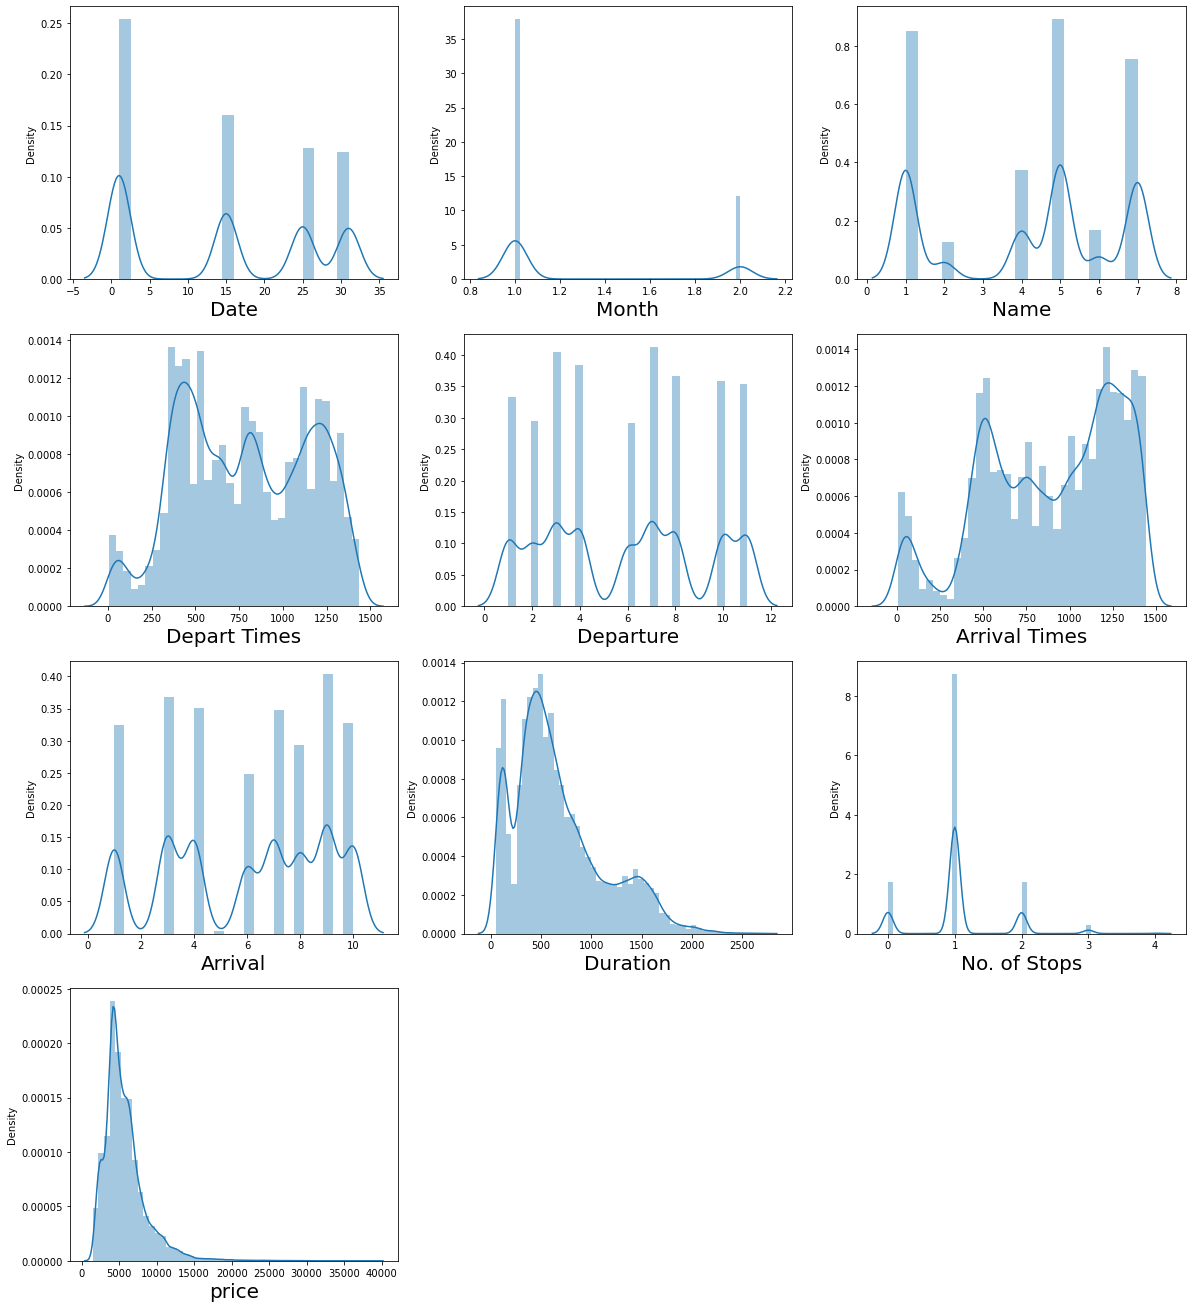

In [22]:
plt.figure(figsize=(20,300),facecolor='white')
plotnumber=1
for column in data.columns:
    if plotnumber<=len(data.columns):
        ax=plt.subplot(50,3,plotnumber)
        sn.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Univariate analysis for categorical columns

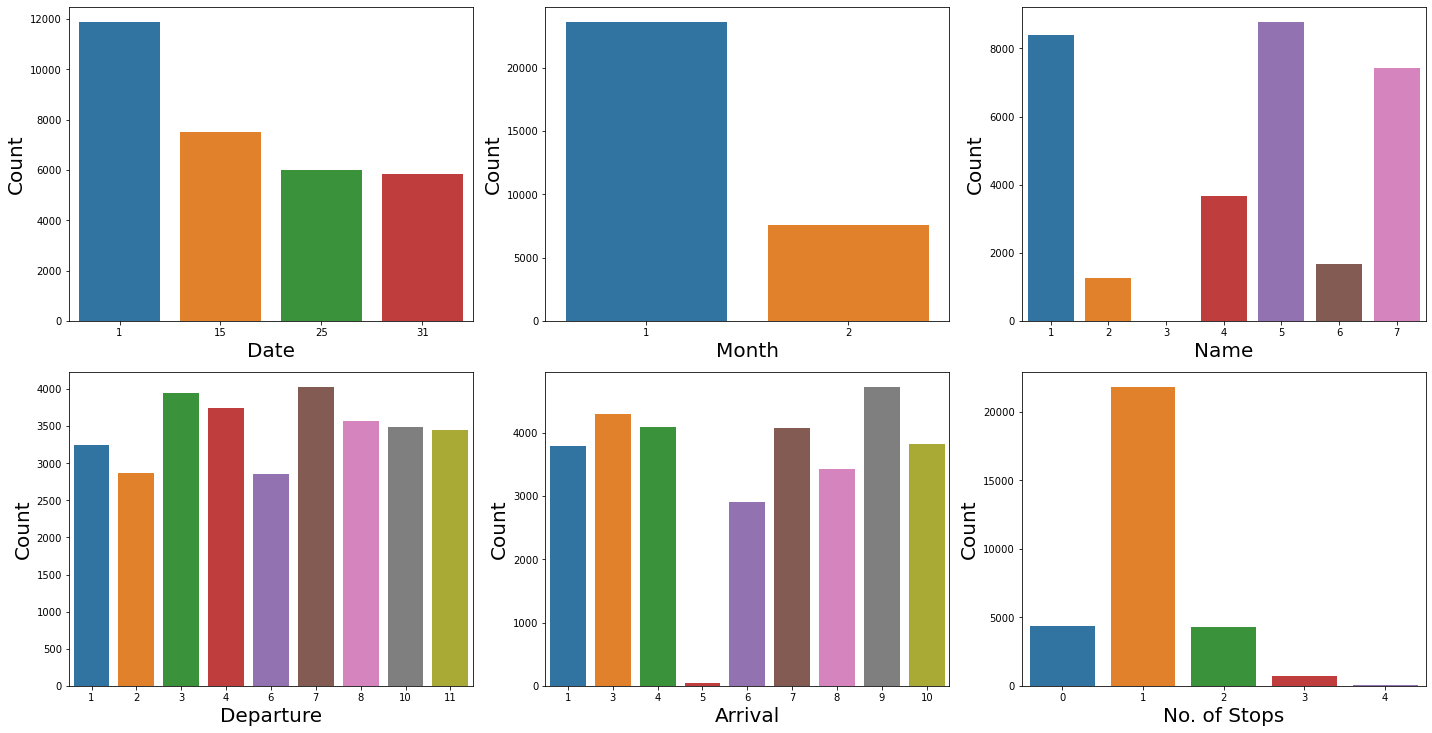

In [23]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for i in data.columns:
    if i not in ['Duration','Depart Times','Arrival Times'] and i!='price':
        ax=plt.subplot(6,3,plotnumber)
        sn.countplot(data[i])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('Count',fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [24]:
data['Name'].value_counts()

5    8781
1    8381
7    7436
4    3675
6    1671
2    1258
3      10
Name: Name, dtype: int64

### Drop categorical value 4 of Name as it has data points less than 5% in the dataset

In [28]:
data=data[data['Name']!=3]

In [27]:
data['No. of Stops'].value_counts()

1    21814
0     4343
2     4293
3      689
4       63
Name: No. of Stops, dtype: int64

In [29]:
data=data[data['No. of Stops']!=4][data['No. of Stops']!=3]

In [30]:
data['Arrival'].value_counts()

9     4571
3     4211
7     4058
4     4041
1     3707
10    3680
8     3327
6     2816
5       39
Name: Arrival, dtype: int64

In [31]:
data=data[data['Arrival']!=5]

### Bivariate analysis for numerical columns

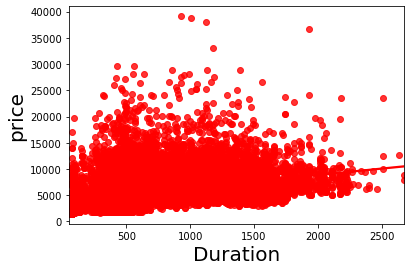

In [30]:
sn.regplot(data['Duration'],data['price'],color='r')
plt.xlabel('Duration',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()

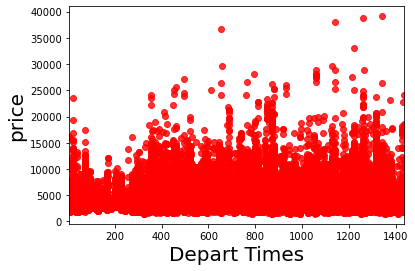

In [31]:
sn.regplot(data['Depart Times'],data['price'],color='r')
plt.xlabel('Depart Times',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()

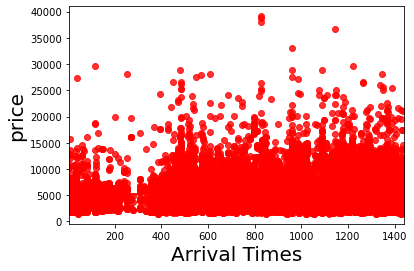

In [32]:
sn.regplot(data['Arrival Times'],data['price'],color='r')
plt.xlabel('Arrival Times',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()

### stripplot for numerical columns

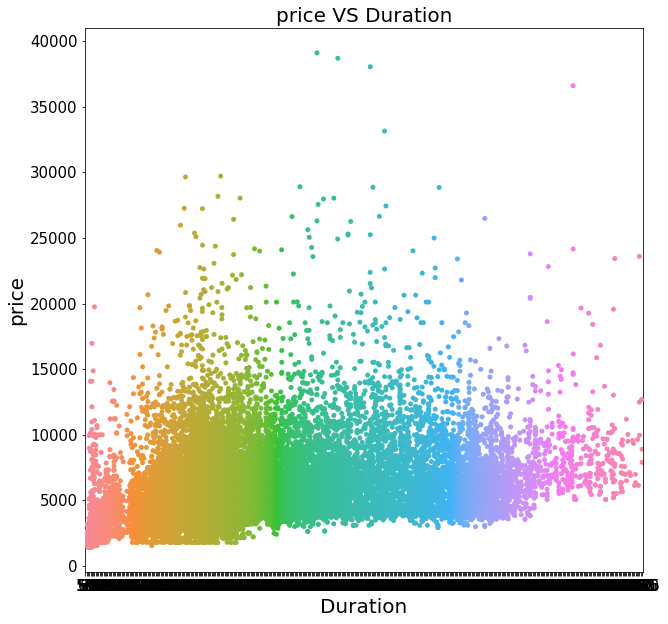

In [33]:
plt.figure(figsize=(10,10))
sn.stripplot(x=data['Duration'] , y=data['price'])
plt.title("price VS Duration",fontsize=20)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.xlabel('Duration',fontsize = 20)
plt.ylabel('price',fontsize = 20)
plt.show()

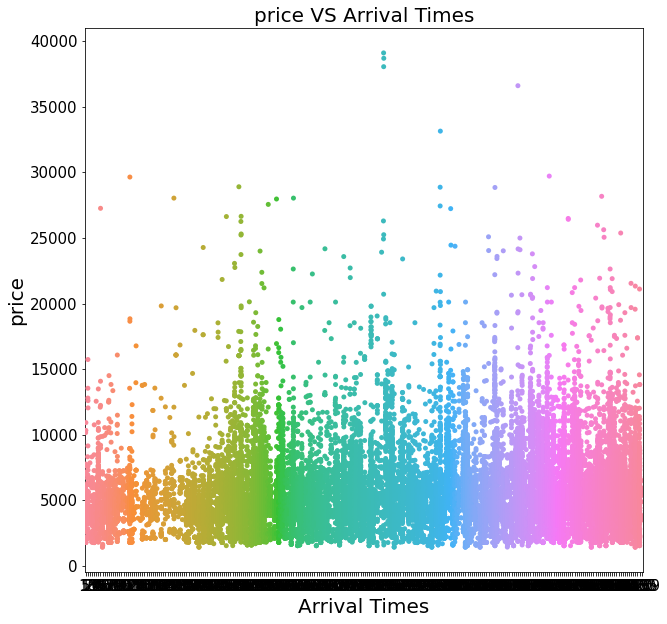

In [34]:
plt.figure(figsize=(10,10))
sn.stripplot(x=data['Arrival Times'] , y=data['price'])
plt.title("price VS Arrival Times",fontsize=20)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.xlabel('Arrival Times',fontsize = 20)
plt.ylabel('price',fontsize = 20)
plt.show()

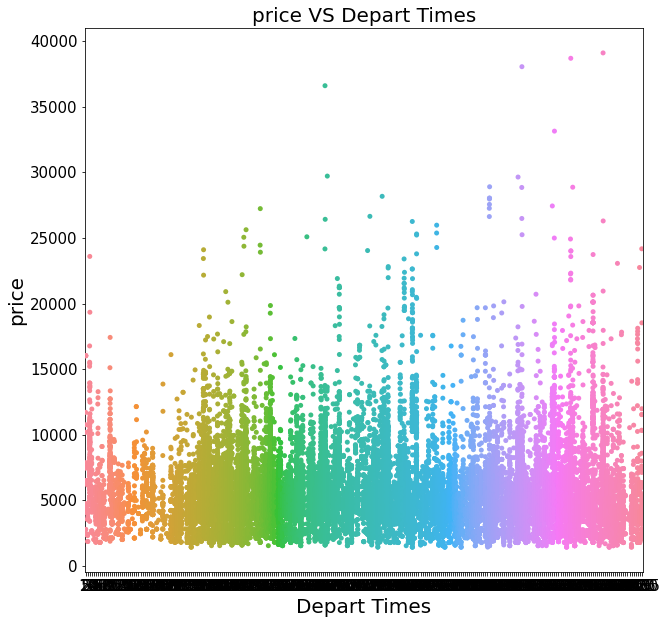

In [35]:
plt.figure(figsize=(10,10))
sn.stripplot(x=data['Depart Times'] , y=data['price'])
plt.title("price VS Depart Times",fontsize=20)
plt.xticks(fontsize=15)  
plt.yticks(fontsize=15)
plt.xlabel('Depart Times',fontsize = 20)
plt.ylabel('price',fontsize = 20)
plt.show()

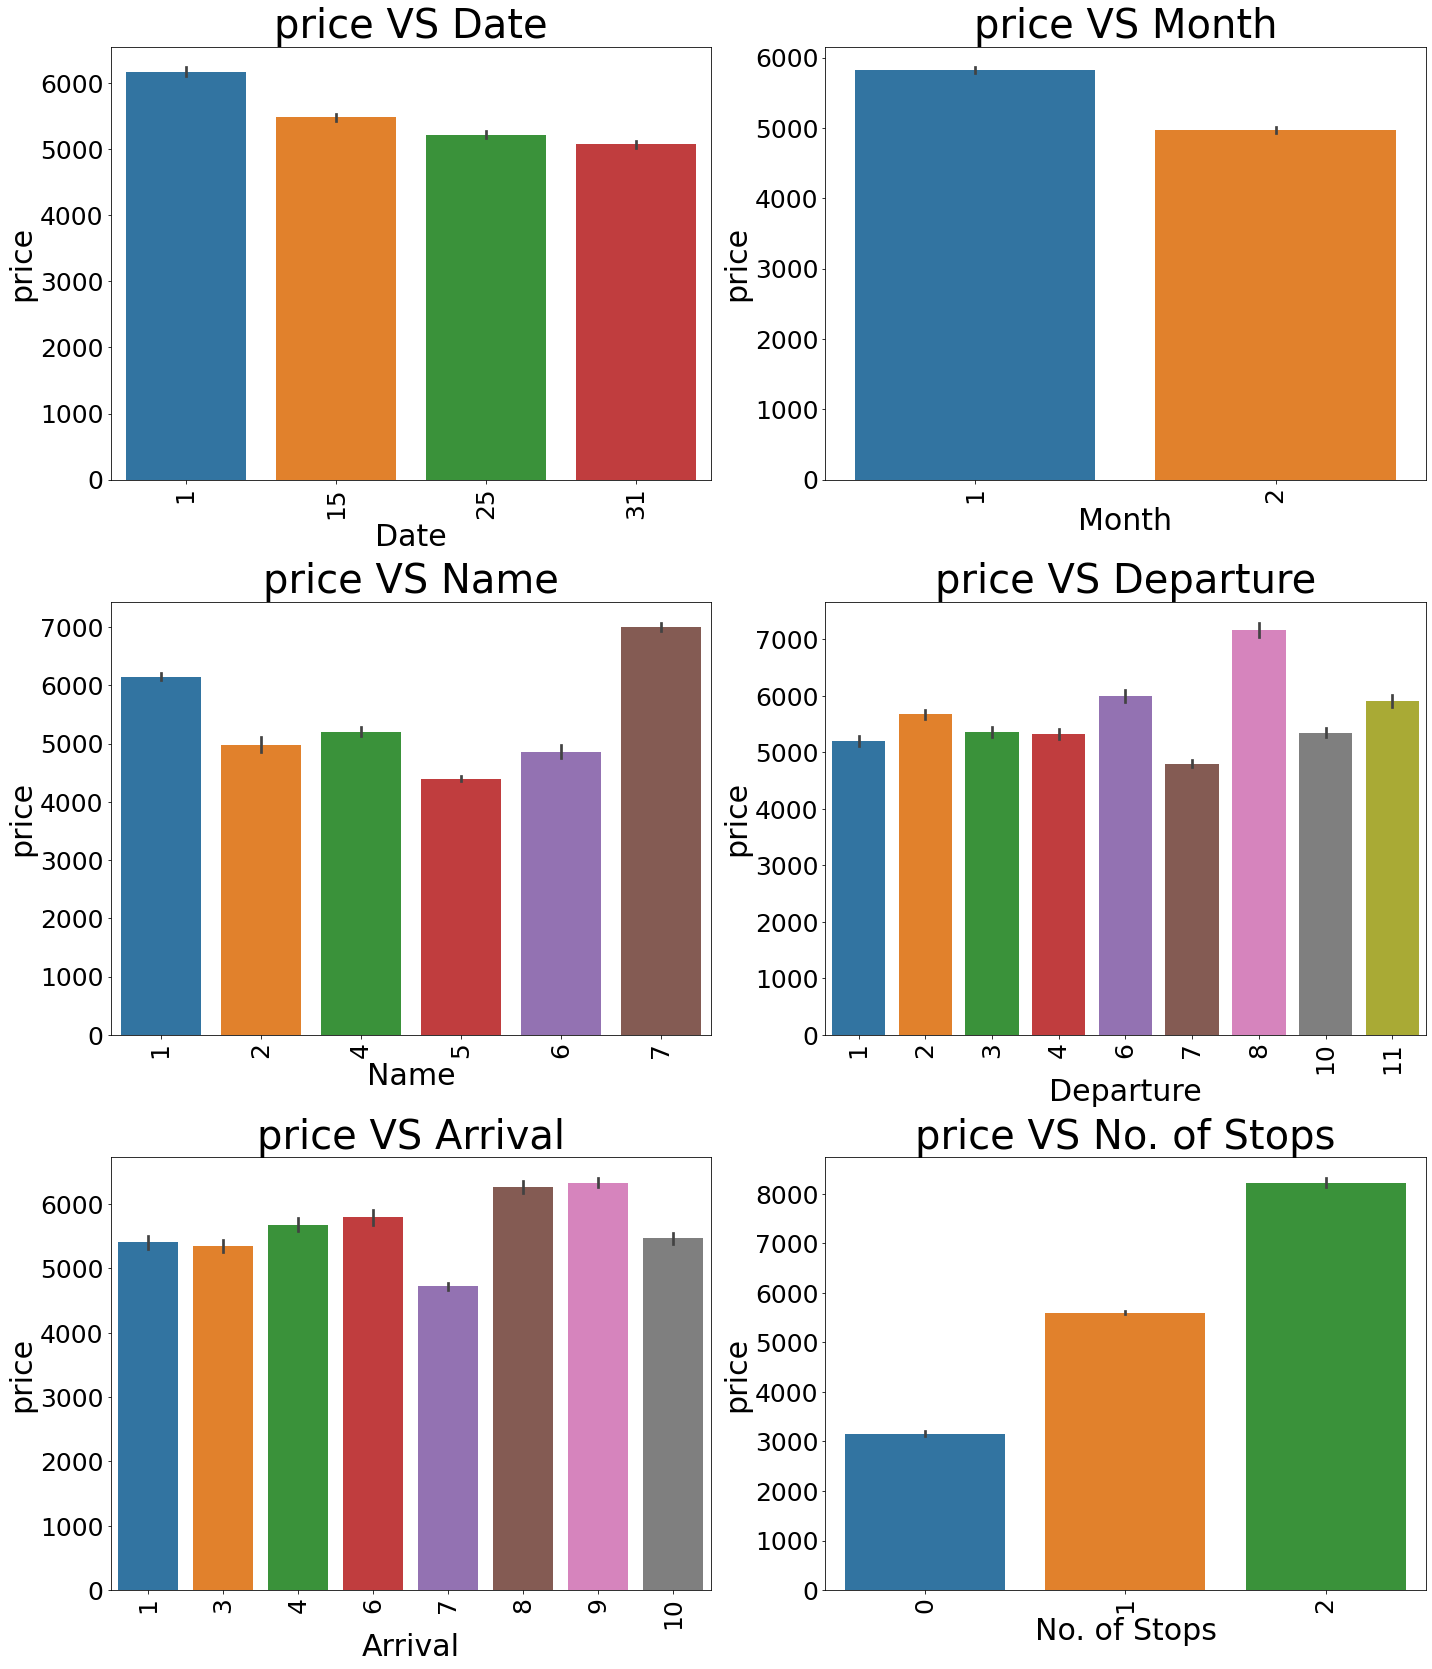

In [32]:
plt.figure(figsize=(20,30))
listy=data.columns
plotnumber=1
for i in range(len(listy)):
    if listy[i]!='Duration' and listy[i]!='price' and listy[i]!='Depart Times' and listy[i]!='Arrival Times':
        plt.subplot(4,2,plotnumber)
        sn.barplot(y=data['price'],x=data[listy[i]])
        plt.title(f"price VS {listy[i]}",fontsize=40)
        plt.xticks(rotation=90,fontsize=25)  
        plt.yticks(rotation=0,fontsize=25)
        plt.xlabel(listy[i],fontsize = 30)
        plt.ylabel('price',fontsize = 30)
        plotnumber+=1
        plt.tight_layout()

### Cat Plot

<Figure size 1440x2160 with 0 Axes>

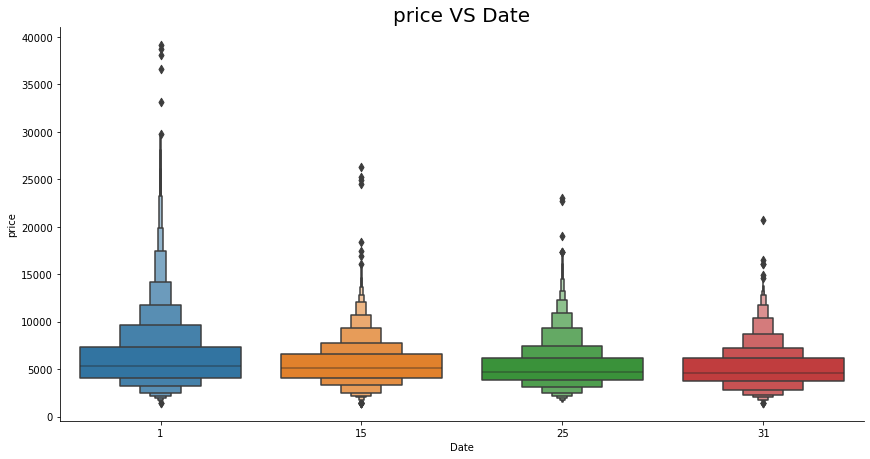

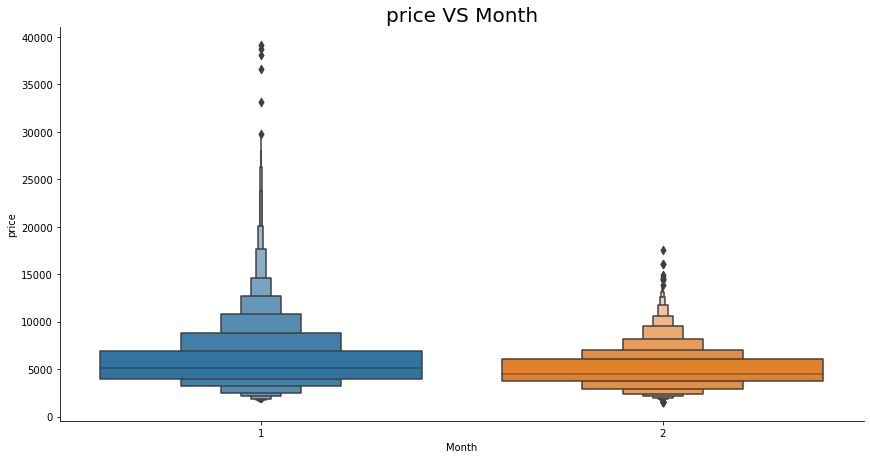

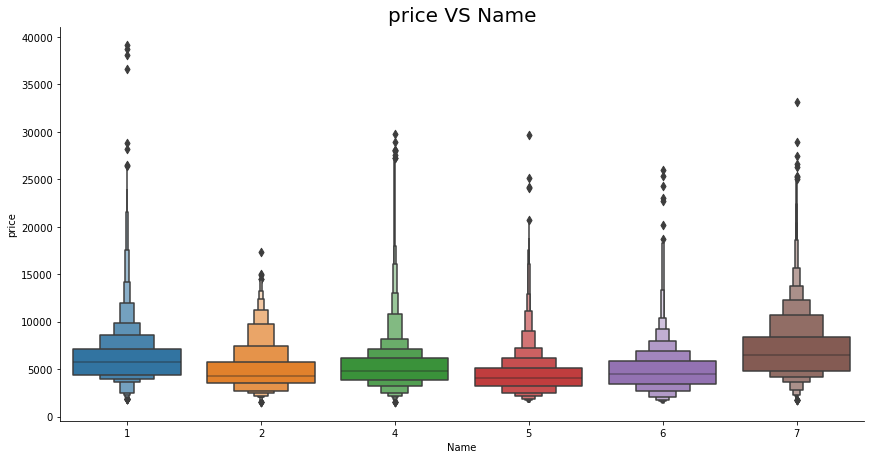

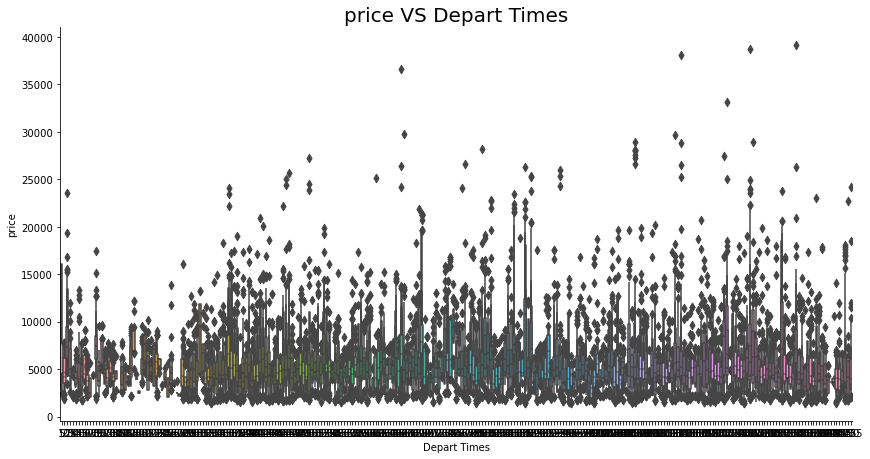

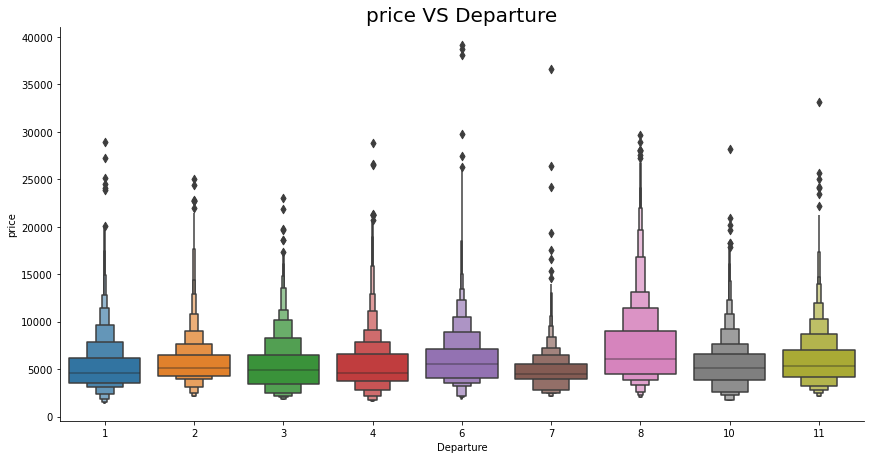

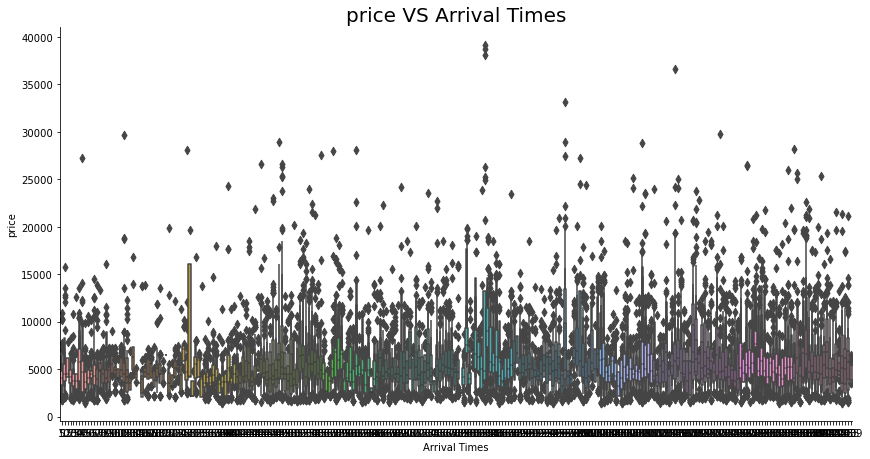

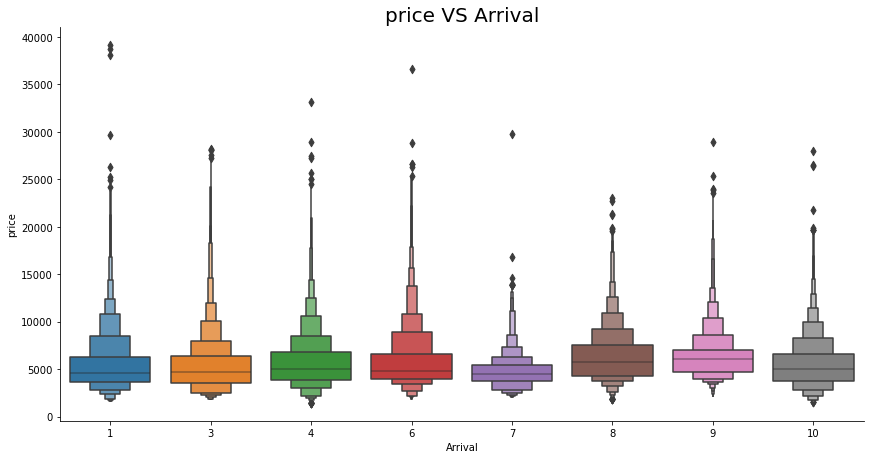

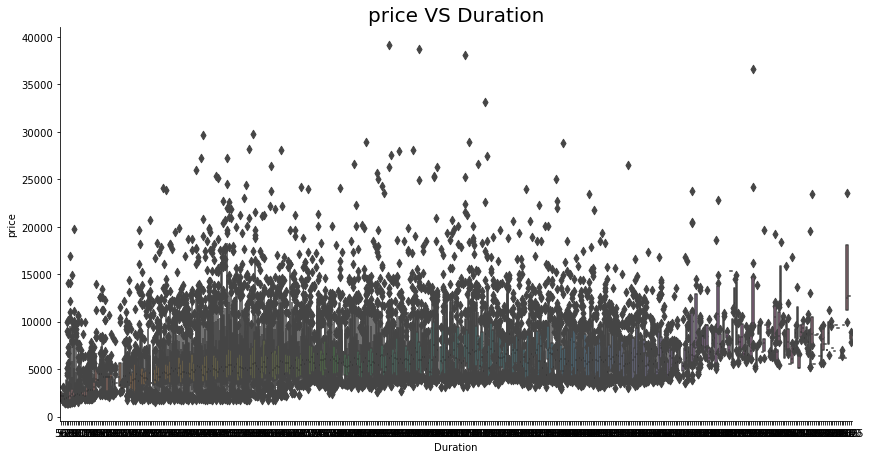

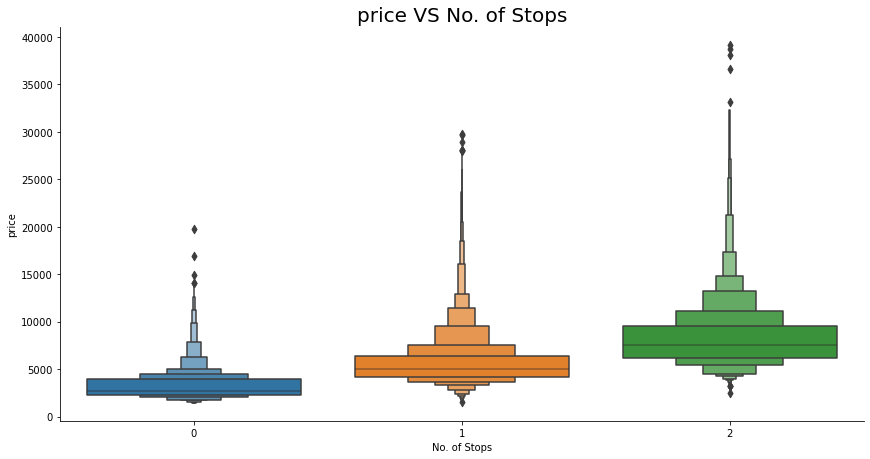

In [33]:
plt.figure(figsize=(20,30))
listy=data.columns
for i in range(len(listy)):
    if listy[i]!='price':
        sn.catplot(y=data['price'],x=data[listy[i]],data=data.sort_values("price", ascending = False), 
            kind = "boxen", height = 6, aspect = 2)
        plt.title(f"price VS {listy[i]}",fontsize=20)
        plt.show()

### pair ploting for data

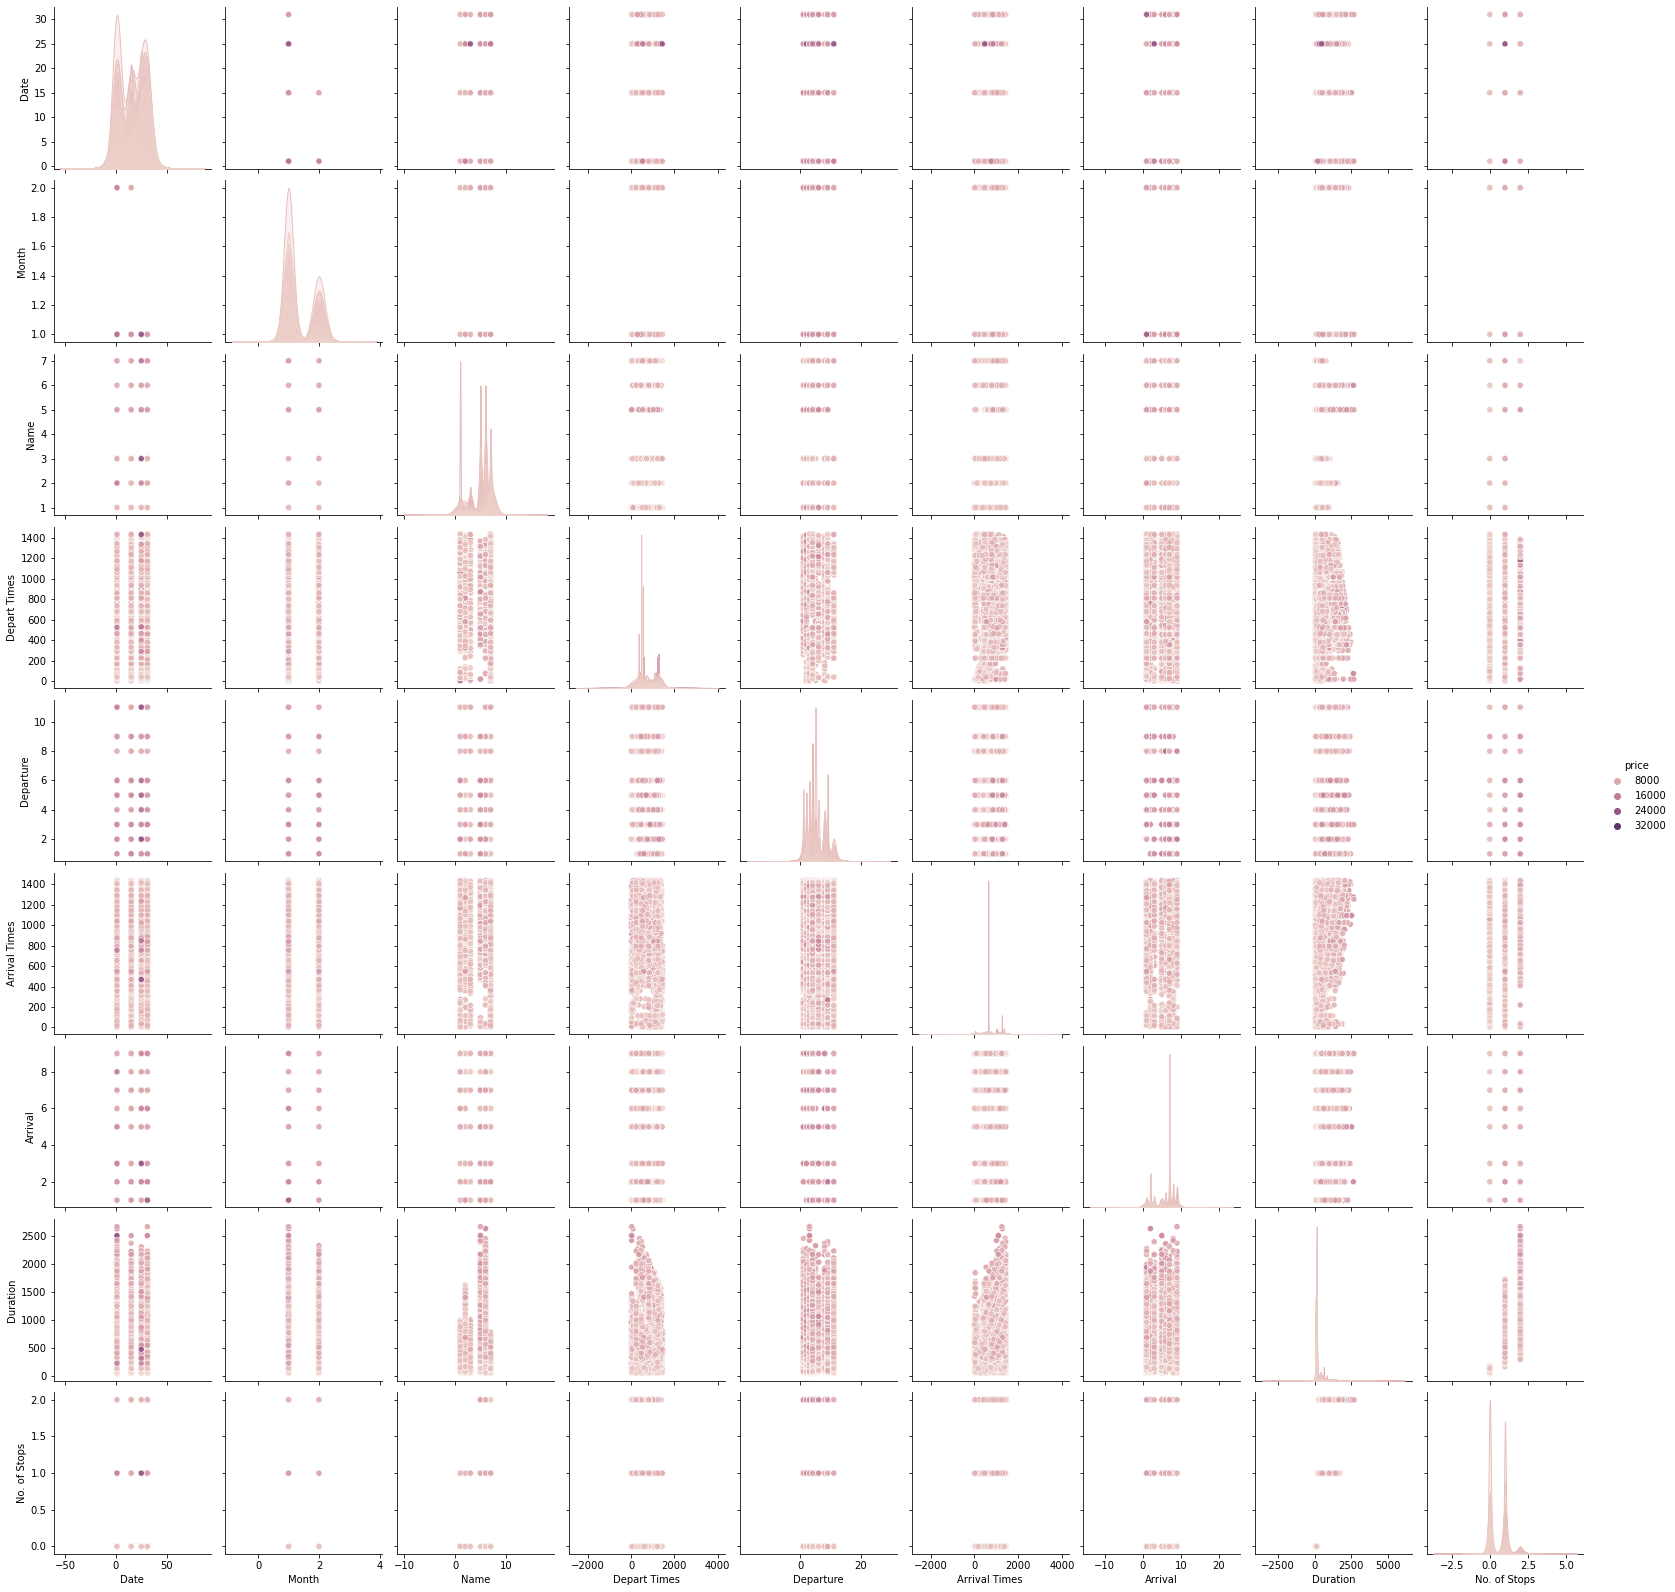

In [38]:
sn.pairplot(data,hue="price")

### Multivariate Analysis

In [39]:
data.corr()

,Date,Month,Name,Depart Times,Departure,Arrival Times,Arrival,Duration,No. of Stops,price
Date,1.000000,-0.504007,-0.000224,0.017329,0.001896,-0.007256,-0.001570,-0.005517,-0.007728,-0.161839
Month,-0.504007,1.000000,-0.006233,-0.003947,0.009945,-0.010873,0.001370,-0.005321,0.003442,-0.131676
Name,-0.000224,-0.006233,1.000000,-0.089952,0.013241,0.061635,-0.005774,0.023500,0.085872,-0.037090
Depart Times,0.017329,-0.003947,-0.089952,1.000000,0.006315,-0.091389,0.012919,0.064540,-0.064961,0.015557
Departure,0.001896,0.009945,0.013241,0.006315,1.000000,-0.003929,-0.128527,0.023899,-0.004692,-0.057981
Arrival Times,-0.007256,-0.010873,0.061635,-0.091389,-0.003929,1.000000,0.016912,0.066061,0.121714,0.104904
Arrival,-0.001570,0.001370,-0.005774,0.012919,-0.128527,0.016912,1.000000,-0.004278,-0.024732,-0.016784
Duration,-0.005517,-0.005321,0.023500,0.064540,0.023899,0.066061,-0.004278,1.000000,0.595357,0.376820
No. of Stops,-0.007728,0.003442,0.085872,-0.064961,-0.004692,0.121714,-0.024732,0.595357,1.000000,0.484740
price,-0.161839,-0.131676,-0.037090,0.015557,-0.057981,0.104904,-0.016784,0.376820,0.484740,1.000000


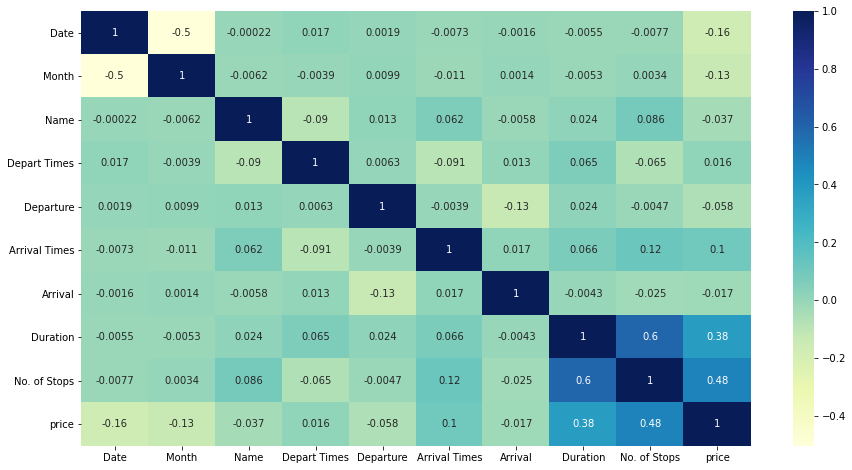

In [40]:
plt.figure(figsize=(15,8))
sn.heatmap(data.corr(),cmap='YlGnBu',annot = True)
plt.show()

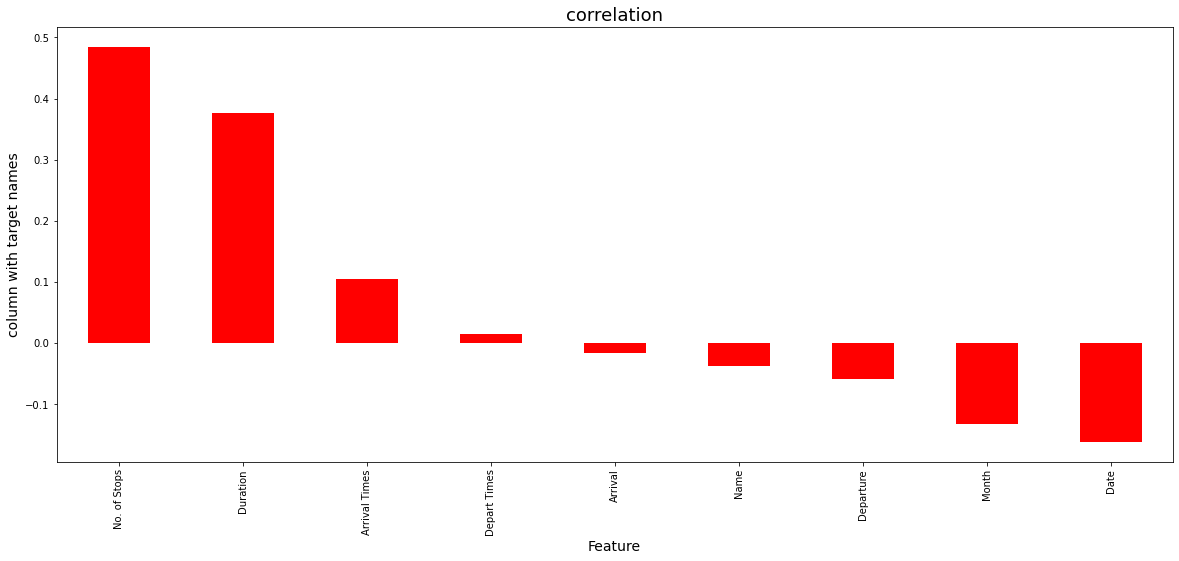

In [41]:
plt.figure(figsize=(20,8))
data.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### Data PreProcessing

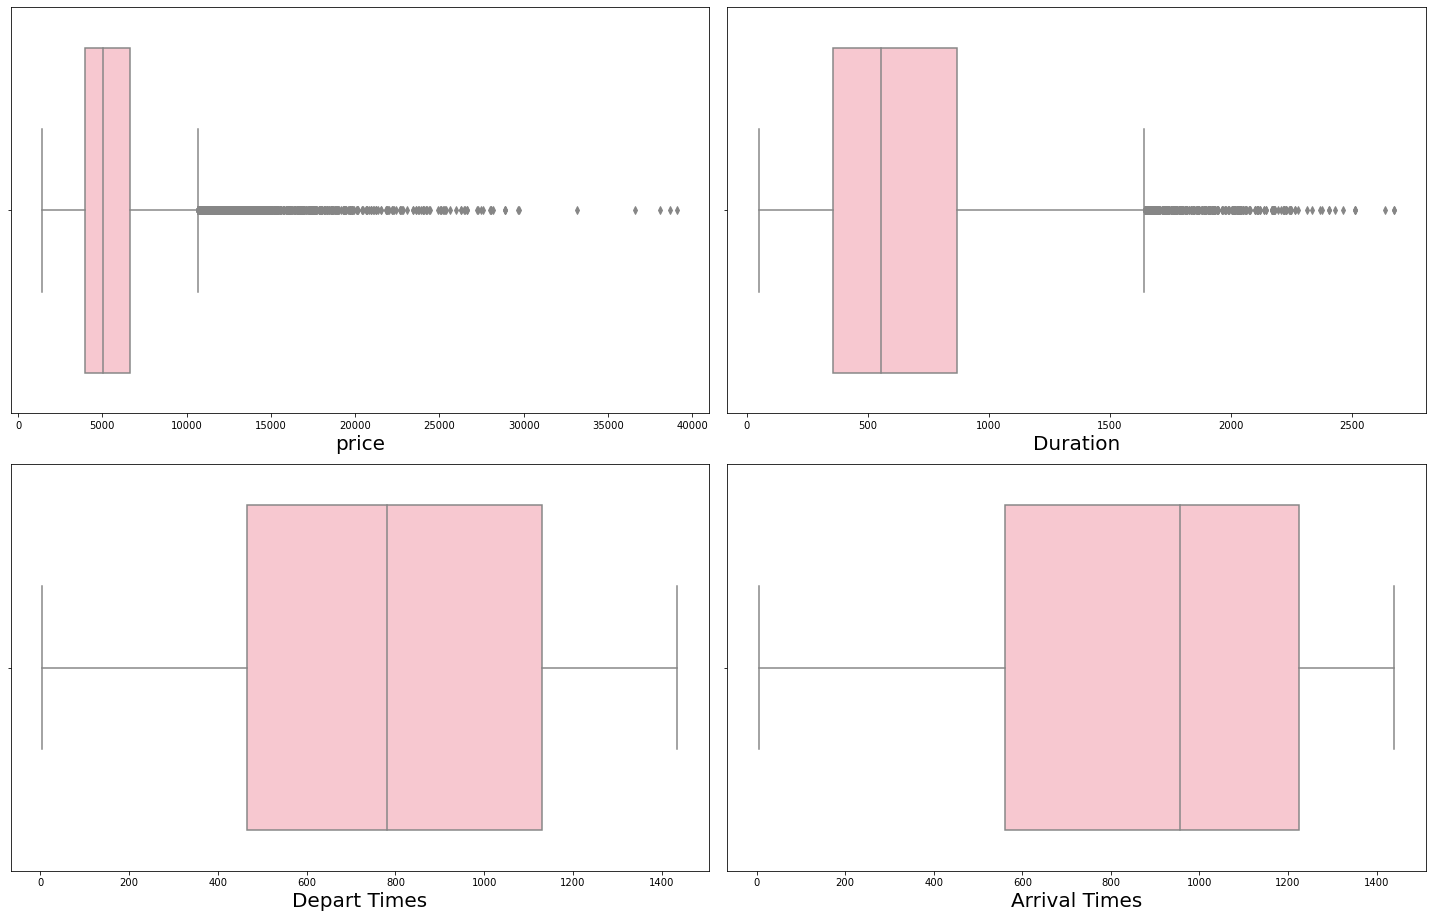

In [42]:
numerical_columns=['price','Duration','Depart Times','Arrival Times']
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [43]:
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3-Q1
data_new1 = data[~((data[numerical_columns] < (Q1-1.5*IQR)) | (data[numerical_columns]> (Q3 + 1.5*Q3))).any(axis = 1)]

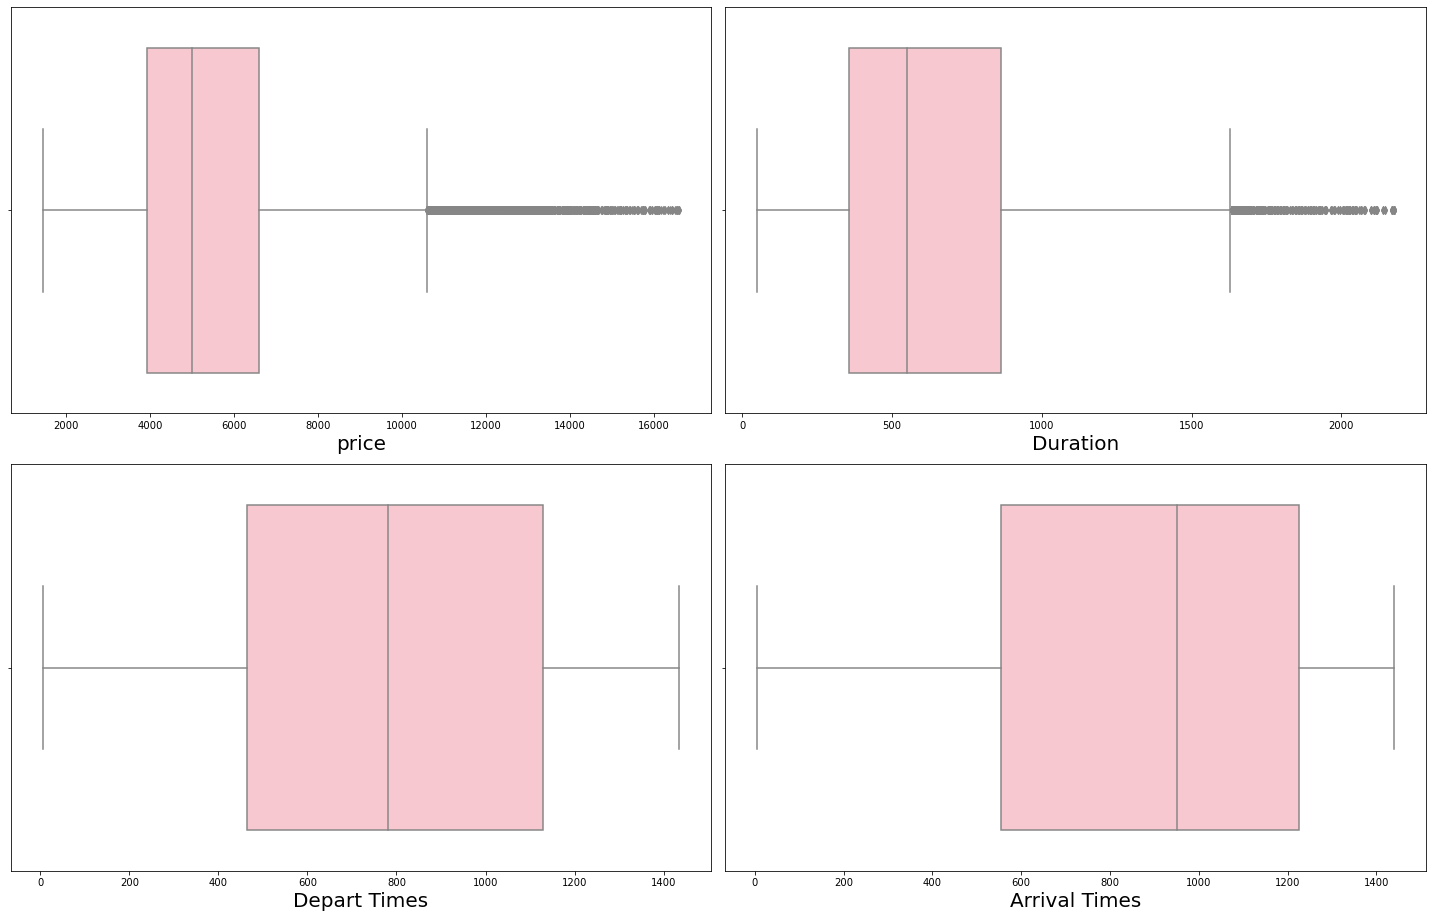

In [44]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data_new1[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [45]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (30411, 10)
Shape After          : (30134, 10)
Percentage Loss      : 0.9108546249712276


In [46]:
features=data[['price','Duration']]
z=np.abs(zscore(features))
df=data[(z<3).all(axis=1)]

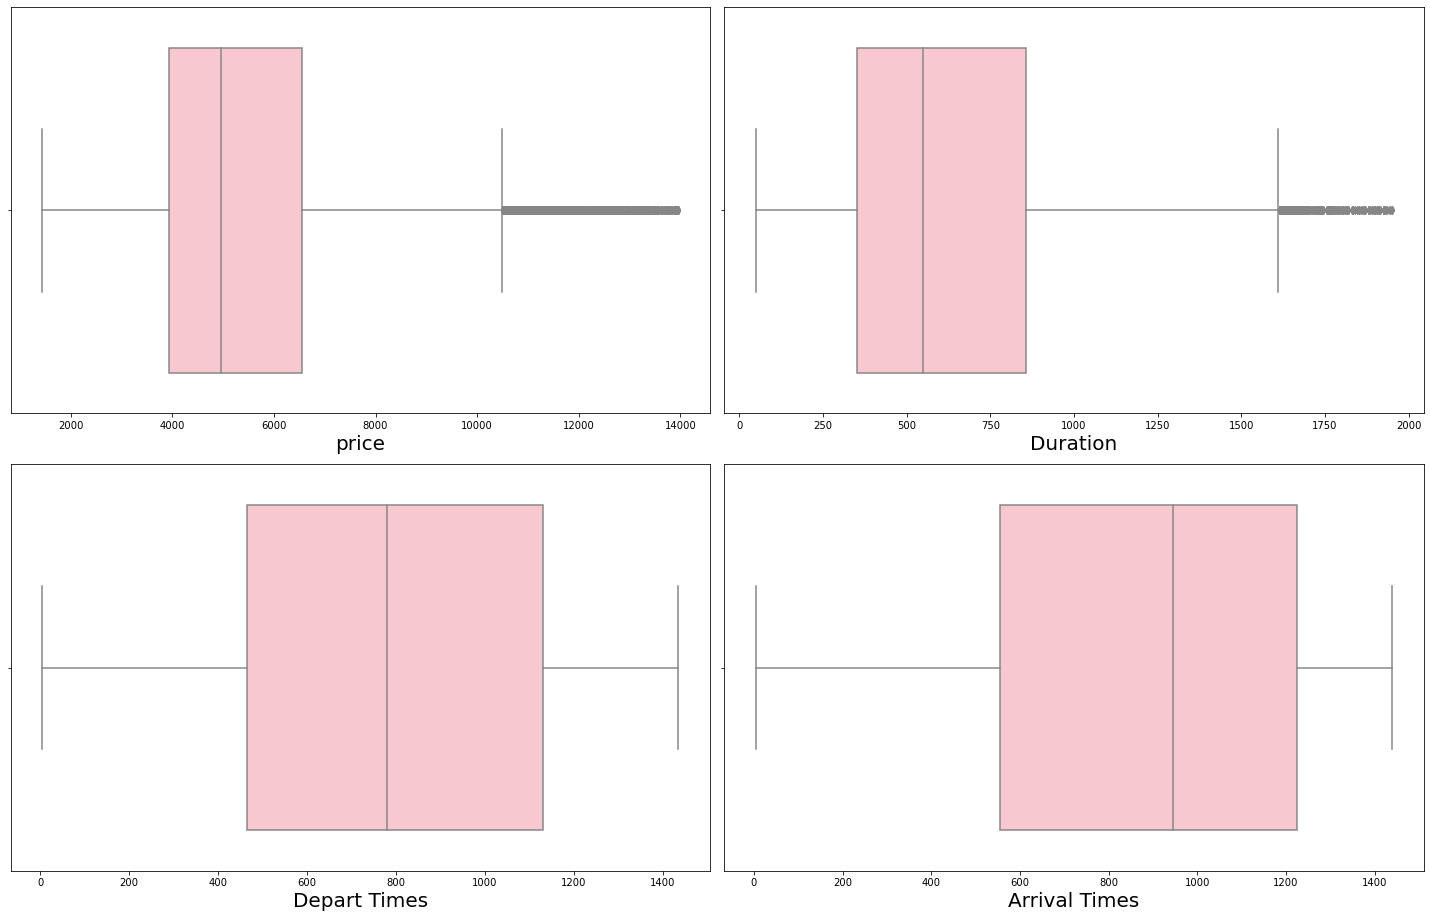

In [47]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(df[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [48]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",df.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-df.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (30411, 10)
Shape After          : (29798, 10)
Percentage Loss      : 2.015717996777482


In [49]:
features=df[['price','Duration']]
z=np.abs(zscore(features))
data_new=df[(z<3).all(axis=1)]

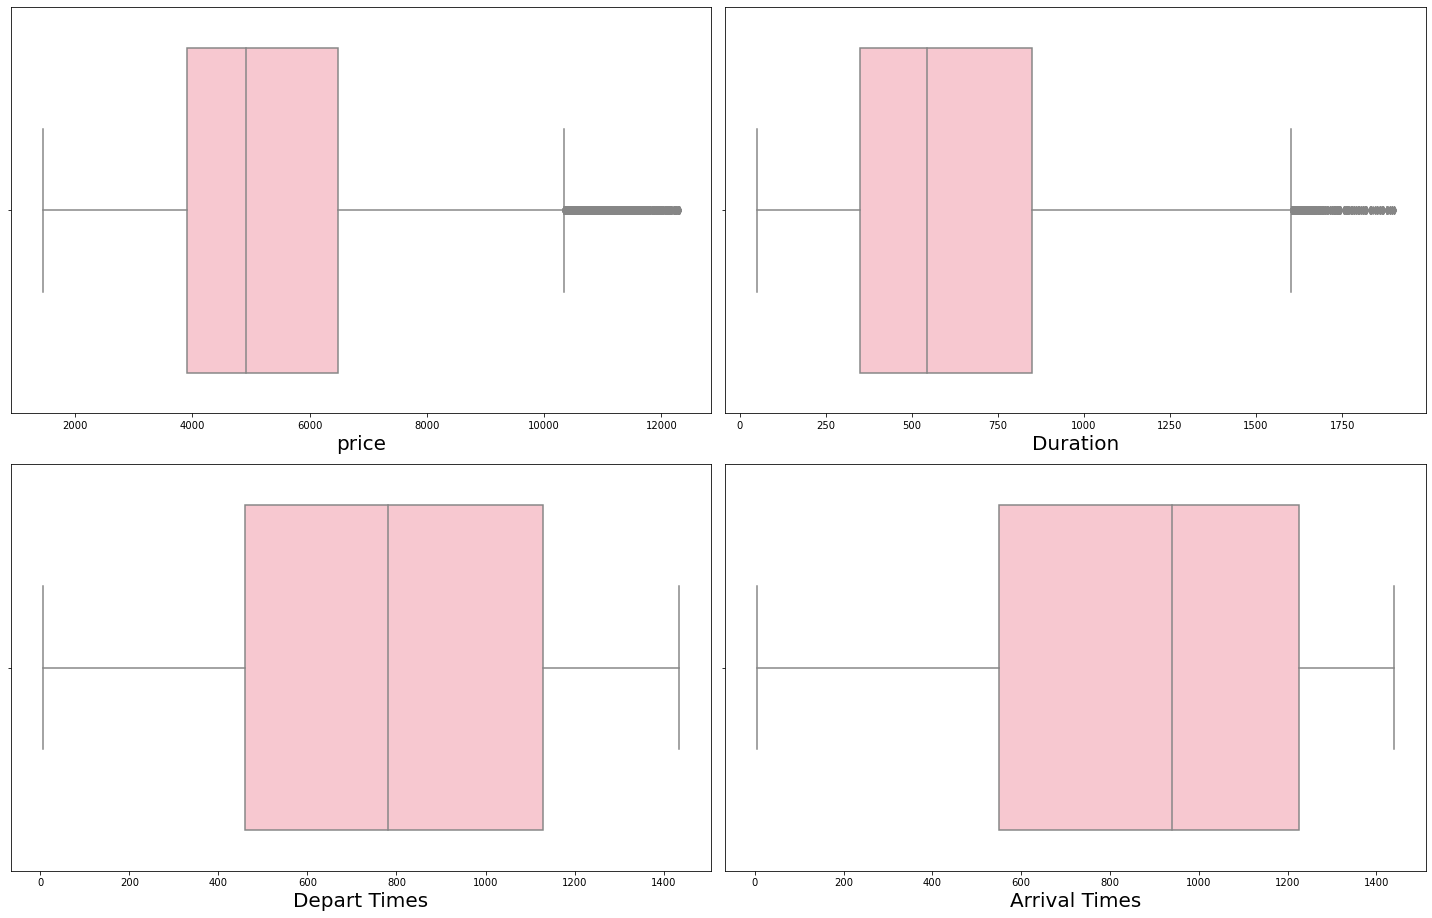

In [50]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data_new[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [51]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",df.shape)
print('Shape After'.ljust(20),":",data_new.shape)
print('Percentage Loss'.ljust(20),":",((df.shape[0]-data_new.shape[0])/df.shape[0])*100)

Shape - Before and After:

Shape Before         : (29798, 10)
Shape After          : (29348, 10)
Percentage Loss      : 1.5101684676823948


In [34]:
numerical_columns=['price','Duration']
for col in numerical_columns:
    if data[col].dtypes != 'object':
        percentile = data[col].quantile([0.01,0.98]).values
        data[col][data[col]<=percentile[0]]=percentile[0]
        data[col][data[col]>=percentile[1]]=percentile[1]

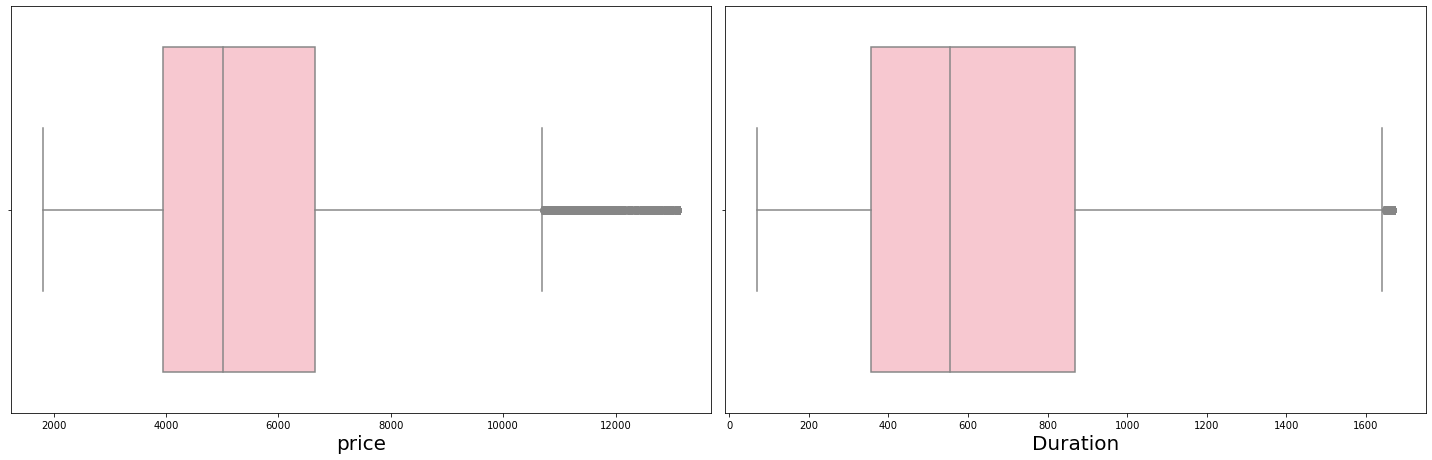

In [35]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(4,2,plotnumber)
        sn.boxplot(data[column],color='pink')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Skewness

In [36]:
numerical_columns=['Duration','Depart Times','Arrival Times']
print(data[numerical_columns].skew())
print(len(data[numerical_columns].skew().loc[data[numerical_columns].skew()>0.55]))

Duration         0.803208
Depart Times    -0.020484
Arrival Times   -0.449050
dtype: float64
1


In [55]:
df_new=data.copy()
df_new["Duration"]=np.log(df_new["Duration"])
print(df_new.skew().loc["Duration"])

-0.7105334521367792


### Seperate feature and target variables

In [37]:
data

,Date,Month,Name,Depart Times,Departure,Arrival Times,Arrival,Duration,No. of Stops,price
0,1,1,6,950,1,1020,4,70,0,1802.0
1,1,1,6,1355,1,1425,4,70,0,1802.0
2,1,1,5,325,1,385,4,70,0,1802.0
3,1,1,5,785,1,850,4,70,0,1802.0
4,1,1,5,990,1,1055,4,70,0,1802.0
...,...,...,...,...,...,...,...,...,...,...
32372,15,2,1,810,2,795,8,1425,1,7079.0
32373,15,2,6,1430,2,470,8,480,1,7227.0
32374,15,2,1,1235,2,795,8,1000,1,7299.0
32375,15,2,5,465,2,875,8,410,1,7383.0


In [38]:
data['price'] = data['price'].astype(int)
y = data[['price']].astype(int)
x = data.drop(columns = ['price'],axis=1)

### Check for multicolinearity issue in dataset using VIF

In [39]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
vif["Features"] = x.columns
vif

,vif,Features
0,2.660222,Date
1,8.052732,Month
2,4.440017,Name
3,0.284251,Depart Times
4,4.006424,Departure
5,-0.291599,Arrival Times
6,4.707159,Arrival
7,0.349494,Duration
8,6.957580,No. of Stops


### Feature Scaling

In [40]:
scaler =StandardScaler()
x[['Duration','Depart Times','Arrival Times']]= scaler.fit_transform(x[['Duration','Depart Times','Arrival Times']])

### model building
below is the code to find best random state to split dataset into train and test for a specific model

In [41]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20,shuffle=True)
        model.fit(x_train,y_train)
        tmp=r2_score(y_test,model.predict(x_test))
        if tmp>score:
            score=tmp
            random=i
    return random

Below are all the models through which we need to iterate through to find the best model

In [42]:
models=[GradientBoostingRegressor(),NuSVR(),LinearRegression(),Ridge(),RidgeCV(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),LinearSVR(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),LGBMRegressor(), XGBRFRegressor(),XGBRegressor()]

Below is the code to iterate all the models, train them and display their acc

In [43]:
for i in models:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20)
    scores=cross_val_score(i,x_train,y_train,cv=5,scoring='r2',n_jobs=-1)
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    if r2_score(y_test,y_pred)>score:
        diff=r2_score(y_test,y_pred)-score
    else:
        diff=score-r2_score(y_test,y_pred)
    print('*'*10)
    print(i)
    print('score',score)
    print('r2',r2_score(y_test,y_pred))
    print('diff',diff)
    print('mae',mean_absolute_error(y_test, y_pred))
    print('rmse',np.sqrt(mean_squared_error(y_test, y_pred)))

**********
GradientBoostingRegressor()
score 0.6031290497773261
r2 0.6101062848811875
diff 0.00697723510386139
mae 1103.4038861824386
rmse 1514.8478897748864
**********
NuSVR()
score 0.016565125770077273
r2 0.0227787944357426
diff 0.006213668665665327
mae 1787.2268880253127
rmse 2398.2383873012827
**********
LinearRegression()
score 0.40038661073447324
r2 0.3983350514798478
diff 0.0020515592546254124
mae 1409.1810920680189
rmse 1881.799135206389
**********
Ridge()
score 0.40038670356284267
r2 0.3983362980805619
diff 0.0020504054822807483
mae 1409.1724649946277
rmse 1881.7971857381954
**********
RidgeCV(alphas=array([ 0.1,  1. , 10. ]))
score 0.40038670366901963
r2 0.3983362985793302
diff 0.0020504050896894555
mae 1409.1724631026989
rmse 1881.7971849582075
**********
BayesianRidge()
score 0.4003865969877249
r2 0.3983408978741675
diff 0.0020456991135573976
mae 1409.1393073558618
rmse 1881.7899924380358
**********
SGDRegressor()
score 0.3831880309955661
r2 0.39187297917550146
diff 0.00868

### Top models are:
    XGBRegressor
    RandomForestRegressor

In [44]:
parameters={'n_estimators': [100, 80, 60, 55, 51, 45],  
              'max_depth': [7, 8],
              'reg_lambda' :[0.26, 0.25, 0.2]}
clf = GridSearchCV(XGBRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  2.5min finished


{'max_depth': 7, 'n_estimators': 100, 'reg_lambda': 0.2}

In [46]:
parameters={"n_estimators":[10,100,500],'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
clf = RandomizedSearchCV(RandomForestRegressor(), parameters, cv=10,scoring="r2",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 359.7min finished


{'n_estimators': 500, 'max_features': 'log2', 'criterion': 'mae'}

In [45]:
besttrain(XGBRegressor(max_depth=7,n_estimators=100,reg_lambda=0.2),x,y)

66

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=66, test_size=0.2)
stack = StackingCVRegressor(regressors=(XGBRegressor(max_depth=8,n_estimators=100,reg_lambda=0.26), 
                                        RandomForestRegressor(criterion='mae',max_features='log2',n_estimators=500)
                                       ),
                            meta_regressor=XGBRegressor(max_depth=8,n_estimators=100,reg_lambda=0.26), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False)
stack.fit(X_train, y_train)
pred = stack.predict(X_test)
score = r2_score(y_test, pred)
print('r2 score test',score)
pred = stack.predict(X_train)
score = r2_score(y_train, pred)
print('r2 score train',score)

r2 score test 0.8406680867084536
r2 score train 0.9515178725660539


In [ ]:
y_pred=stack.predict(X_test)
score=r2_score(y_test,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y_test,y_pred))
print('mean squared error:',mean_squared_error(y_test,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))
scores =cross_val_score(StackingCVRegressor(regressors=(XGBRegressor(max_depth=8,n_estimators=100,reg_lambda=0.26), 
                                        RandomForestRegressor(criterion='mae',max_features='log2',n_estimators=500)
                                       ),
                            meta_regressor=XGBRegressor(max_depth=8,n_estimators=100,reg_lambda=0.26), 
                            cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False),x,y,cv=5,n_jobs=-1,verbose=1)
print('cross val score',scores.mean())
print('std err',scores.std())

coeff of determination is: 0.8406680867084536
mean absolute error: 607.5729074222603
mean squared error: 942970.4674027719
root mean square error: 971.0666647572514


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
y_pred=stack.predict(x)
score=r2_score(y,y_pred)
print('coeff of determination is:',score)
print('mean absolute error:',mean_absolute_error(y,y_pred))
print('mean squared error:',mean_squared_error(y,y_pred))
print('root mean square error:',np.sqrt(mean_squared_error(y,y_pred)))

In [ ]:
y_pred=stack.predict(x)
data['Pred']=[round(i) for i in y_pred]
data

In [ ]:
data['diff']=data['Pred']-data['price']
data

In [ ]:
max(data['diff']),min(data['diff'])

In [ ]:
data.sort_values(by=['diff'],ascending=False)

In [ ]:
sn.lmplot(x='price',y='Pred',data=df,palette='rainbow')

In [ ]:
plt.plot(X_test,y_test,'r*')
plt.plot(X_test,stack.predict(X_test),'b.')
plt.show()

In [ ]:
plt.plot(x,y,'r*')
plt.plot(x,data['Pred'],'b.')
plt.show()

In [ ]:
sn.distplot(data['Price'])
sn.distplot(data['Pred'])

In [ ]:
joblib.dump(stack,'stack.pkl')